In [1]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import DirectoryLoader, TextLoader
from langchain_nvidia_ai_endpoints import ChatNVIDIA

dir_source_path = './data/tmp_txt'
loader = DirectoryLoader(
    f'./{dir_source_path}',
    glob="**/*.txt",
    loader_cls=TextLoader  # Explicitly use TextLoader for .txt files
)
docs = []
for doc in loader.load():
    source = doc.metadata['source'].strip(dir_source_path)
    title_rest, source = source.split('[')[:-1], source.split('[')[-1]
    video_title = '['.join(title_rest)
    video_id = source.split(']')[0]
    doc.metadata['video_id'] = video_id
    doc.metadata['video_title'] = video_title
    docs.append(doc)

In [2]:
docs[0]

Document(metadata={'source': 'data/tmp_txt/BERT and GPT in Language Models like ChatGPT or BLOOM ｜  EASY Tutorial on Large Language Models LLM [ewjlmLQI9kc].en.txt', 'video_id': 'ewjlmLQI9kc', 'video_title': 'BERT and GPT in Language Models like ChatGPT or BLOOM ｜  EASY Tutorial on Large Language Models LLM '}, page_content="hello Community\nTransformer language mods Bert versus\nGPT which model is better\nboth are based on a Transformer\narchitecture you have here on the left\nside your encoder and on the right side\nyour decoder architecture but if you\nlook closely you see there are the same\nelements you have a multi-headed tension\nand a feed forward Network in each layer\nin the encoder and in the decoder the\nonly thing is different you have\nadditional and mask multi-header tension\nin the decoder stack so you guessed it\nthe encoder stack is bird from Google\nand the decoder stack is GPT from open\nAI\nnow there's some significant difference\nbecause of this additional multi-h

In [3]:
docs[0].page_content

"hello Community\nTransformer language mods Bert versus\nGPT which model is better\nboth are based on a Transformer\narchitecture you have here on the left\nside your encoder and on the right side\nyour decoder architecture but if you\nlook closely you see there are the same\nelements you have a multi-headed tension\nand a feed forward Network in each layer\nin the encoder and in the decoder the\nonly thing is different you have\nadditional and mask multi-header tension\nin the decoder stack so you guessed it\nthe encoder stack is bird from Google\nand the decoder stack is GPT from open\nAI\nnow there's some significant difference\nbecause of this additional multi-head\nattention to this mask GPT is only\ndirectional\nthis means it looks back at the previous\nwords to predict the next word while\nbird is bi-directional considers the\nwords that come before and after the\nmissing masking term and predicts what\nthe word should be\nalso in bird you have a pre-training and\na fine tuning 

In [4]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, chunk_overlap=100
)
doc_splits = text_splitter.split_documents(docs)

In [5]:
doc_splits[0]

Document(metadata={'source': 'data/tmp_txt/BERT and GPT in Language Models like ChatGPT or BLOOM ｜  EASY Tutorial on Large Language Models LLM [ewjlmLQI9kc].en.txt', 'video_id': 'ewjlmLQI9kc', 'video_title': 'BERT and GPT in Language Models like ChatGPT or BLOOM ｜  EASY Tutorial on Large Language Models LLM '}, page_content='hello Community\nTransformer language mods Bert versus\nGPT which model is better\nboth are based on a Transformer\narchitecture you have here on the left\nside your encoder and on the right side\nyour decoder architecture but if you\nlook closely you see there are the same\nelements you have a multi-headed tension\nand a feed forward Network in each layer\nin the encoder and in the decoder the\nonly thing is different you have\nadditional and mask multi-header tension\nin the decoder stack so you guessed it')

In [6]:
doc_splits[0].page_content

'hello Community\nTransformer language mods Bert versus\nGPT which model is better\nboth are based on a Transformer\narchitecture you have here on the left\nside your encoder and on the right side\nyour decoder architecture but if you\nlook closely you see there are the same\nelements you have a multi-headed tension\nand a feed forward Network in each layer\nin the encoder and in the decoder the\nonly thing is different you have\nadditional and mask multi-header tension\nin the decoder stack so you guessed it'

In [7]:
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
retriever = FAISS.from_documents(doc_splits, embeddings).as_retriever(search_kwargs={"k": 20})

/Users/hermanda/Documents/projects/yt-search/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.retrievers import EnsembleRetriever
from langchain_community.retrievers import BM25Retriever
from langchain_community.vectorstores import FAISS
from langchain.retrievers.document_compressors import FlashrankRerank



embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
reranker = FlashrankRerank()

bm25_retriever = BM25Retriever.from_documents(doc_splits)
faiss_vectorstore = FAISS.from_documents(doc_splits, embeddings)
faiss_retriever = faiss_vectorstore.as_retriever(search_kwargs={"k": 5})

hybrid_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, faiss_retriever], weights=[0.7, 0.3]
)

In [9]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model = "llama3.1:8b",
    temperature = 0.8,
    num_predict = 1024,
)

In [10]:
messages = [
    ("system", "You are a helpful translator. Translate the user sentence to French."),
    ("human", "I love programming."),
]
llm.invoke(messages)

INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


AIMessage(content='"J\'adore la programmation."', additional_kwargs={}, response_metadata={'model': 'llama3.1:8b', 'created_at': '2025-01-28T14:07:00.224271Z', 'done': True, 'done_reason': 'stop', 'total_duration': 19485217750, 'load_duration': 58516208, 'prompt_eval_count': 32, 'prompt_eval_duration': 18896000000, 'eval_count': 10, 'eval_duration': 529000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-997377e6-78c6-484d-a026-b4f28a09ea79-0', usage_metadata={'input_tokens': 32, 'output_tokens': 10, 'total_tokens': 42})

In [11]:
from pydantic import BaseModel

class Person(BaseModel):
    age: int
    name: str

messages = "Patricia is 25 years old."
llm.with_structured_output(Person).invoke(messages)

INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Person(age=25, name='Patricia')

In [12]:
question = "What is BERT?"

In [13]:
from typing import Literal, Optional, Tuple, List
from langchain_core.pydantic_v1 import BaseModel, Field

class SubQuery(BaseModel):
    """Given a user question, break it down into distinct sub questions that \
    you need to answer in order to answer the original question."""

    questions: List[str] = Field(description="The list of sub questions")

sub_question_generator = llm.with_structured_output(SubQuery)
print(sub_question_generator.invoke(question))

/Users/hermanda/Documents/projects/yt-search/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)
INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


questions=['What is BERT?']


In [14]:
# from langchain import hub
# from langchain_core.output_parsers import StrOutputParser

# # Prompt
# prompt = hub.pull("rlm/rag-prompt")

# # Post-processing
# def format_docs(docs):
#     return "\n\n".join(doc.page_content for doc in docs)

# # Chain
# rag_chain = prompt | llm | StrOutputParser()

# # Run
# docs = hybrid_retriever.get_relevant_documents(question)
# generation = rag_chain.invoke({"context": format_docs(docs), "question": question})
# print(generation)

In [15]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser

# Prompt
prompt = hub.pull("rlm/rag-prompt")

# Post-processing to format documents
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Chain
rag_chain = prompt | llm | StrOutputParser()

# Retrieve relevant documents
docs = hybrid_retriever.get_relevant_documents(question)
sources = [doc.metadata.get('video_id', 'No source found') for doc in docs]
unique_sources = list(set(sources))

# Generate answer
generation = rag_chain.invoke({
    "context": format_docs(docs),
    "question": question
})

# Display results
print("Answer:", generation)
print("\nSources:", *unique_sources, sep="\n- ")

/Users/hermanda/Documents/projects/yt-search/.venv/lib/python3.12/site-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(
/var/folders/px/9nyw3bhn591bw846mpj068gc0000gn/T/ipykernel_90546/1953140405.py:15: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = hybrid_retriever.get_relevant_documents(question)
INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Answer: BERT, or Bidirectional Encoder Representations from Transformers, is a popular language model developed by Google. It aims to learn the relationships between sentences and predict the next sentence given one. BERT uses transformer architecture and has two versions: BERT Base and BERT Large.

Sources:
- t45S_MwAcOw
- 6ahxPTLZxU8
- ioGry-89gqE
- 7kLi8u2dJz0
- xI0HHN5XKDo


In [16]:
from langchain_core.prompts import ChatPromptTemplate

### Retrieval Grader

# Data model
class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""

    binary_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
    )


# LLM with function call

retrieval_grader = llm.with_structured_output(GradeDocuments)

# Prompt
system = """You are a grader assessing relevance of a retrieved document to a user question. \n 
    It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
    If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""

grade_prompt = ChatPromptTemplate.from_messages(
    [
     
        ("system", system),
        ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
    ]
)

retrieval_grader = grade_prompt | retrieval_grader
docs = hybrid_retriever.get_relevant_documents(question)
doc_txt = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))

INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


binary_score='no'


In [17]:
### Hallucination Grader

# Data model
class GradeHallucinations(BaseModel):
    """Binary score for hallucination present in generation answer."""

    binary_score: str = Field(
        description="Answer is grounded in the facts, 'yes' or 'no'"
    )


hallucination_grader = llm.with_structured_output(GradeHallucinations)

# Prompt
system = """You are a grader assessing whether an LLM generation is grounded in / supported by a set of retrieved facts. \n 
     Give a binary score 'yes' or 'no'. 'Yes' means that the answer is grounded in / supported by the set of facts."""
hallucination_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Set of facts: \n\n {documents} \n\n LLM generation: {generation}"),
    ]
)

hallucination_grader = hallucination_prompt | hallucination_grader
hallucination_grader.invoke({"documents": format_docs(docs), "generation": generation})

INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


GradeHallucinations(binary_score='no')

In [19]:
### Answer Grader

# Data model
class GradeAnswer(BaseModel):
    """Binary score to assess answer addresses question."""

    binary_score: str = Field(
        description="Answer addresses the question, 'yes' or 'no'"
    )


generation_grader = llm.with_structured_output(GradeAnswer)

# Prompt
system = """You are a grader assessing whether an answer addresses / resolves a question \n 
     Give a binary score 'yes' or 'no'. Yes' means that the answer resolves the question."""
answer_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "User question: \n\n {question} \n\n LLM generation: {generation}"),
    ]
)

answer_grader = answer_prompt | generation_grader
answer_grader.invoke({"question": question, "generation": generation})

INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


GradeAnswer(binary_score='no')

In [20]:
### Question Re-writer

# Prompt
system = """You a question re-writer that converts an input question to a better version that is optimized \n 
     for vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning."""
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "human",
            "Here is the initial question: \n\n {question} \n Formulate an improved question.",
        ),
    ]
)

question_rewriter = re_write_prompt | llm | StrOutputParser()
question_rewriter.invoke({"question": question})

INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


'After analyzing the input question, I\'ve formulated an improved version that\'s more optimized for vectorstore retrieval:\n\n**Improved Question:** "What is BERT, a language model?"\n\nI made the following changes to optimize the query:\n\n1. **Added entity**: I explicitly mentioned "BERT" as the entity of interest, making it clear what the user is looking for.\n2. **Contextualized the query**: By adding "a language model", I provided more context about BERT\'s domain and functionality, which can help vectorstore models better understand the intent behind the question.\n\nThese changes should improve the relevance and accuracy of the search results, making it easier for the vectorstore to retrieve the most relevant information about BERT.'

In [21]:
from typing import List

from typing_extensions import TypedDict


class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        documents: list of documents
    """

    question: str
    sub_questions:  List[str]
    generation: str
    documents: List[str]

In [22]:
### Nodes

def decompose(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---QUERY DECOMPOSITION ---")
    question = state["question"]

    # Reranking
    sub_queries = sub_question_generator.invoke(question)
    return {"sub_questions": sub_queries.questions, "question": question}

def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    sub_questions = state["sub_questions"]
    question = state["question"]

    # Retrieval
    documents = []
    for sub_question in sub_questions:
        docs = hybrid_retriever.get_relevant_documents(sub_question)
        documents.extend(docs)
    return {"documents": documents, "question": question}


def rerank(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RERANK---")
    question = state["question"]
    documents = state["documents"]

    # Reranking
    documents = reranker.compress_documents(query=question, documents=documents)
    return {"documents": documents, "question": question}

In [23]:
def generate(state):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE---")
    question = state["question"]
    documents = state["documents"]

    # RAG generation
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {"documents": documents, "question": question, "generation": generation}


def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with only filtered relevant documents
    """

    print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
    question = state["question"]
    documents = state["documents"]

    # Score each doc
    filtered_docs = []
    for d in documents:
        attepmts = 0
        score = None
        while isinstance(score, type(None)) and attepmts < 3:
            try:
                score = retrieval_grader.invoke(
                    {"question": question, "document": d.page_content}, 
                    {"recursion_limit": 100}
                )
            except Exception as e:
                print(f"Error: {e}")
                attepmts += 1
                continue
        grade = score.binary_score
        if grade == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
        else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            continue
    return {"documents": filtered_docs, "question": question}


def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("---TRANSFORM QUERY---")
    question = state["question"]
    documents = state["documents"]

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})
    return {"documents": documents, "question": better_question}

In [24]:
### Edges


def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    state["question"]
    filtered_documents = state["documents"]

    if not filtered_documents:
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print(
            "---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---"
        )
        return "transform_query"
    # We have relevant documents, so generate answer
    print("---DECISION: GENERATE---")
    return "generate"
    
def grade_generation_v_documents_and_question(state):
    """
    Determines whether the generation is grounded in the document and answers question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Decision for next node to call
    """

    print("---CHECK HALLUCINATIONS---")
    question = state["question"]
    documents = state["documents"]
    generation = state["generation"]

    attepmts = 0
    score = None
    while isinstance(score, type(None)) and attepmts < 3:
        try:
            score = hallucination_grader.invoke(
                {"documents": documents, "generation": generation}
            )
        except Exception as e:
            print(f"Error: {e}")
            attepmts += 1
            continue
            
    print("score", score)
    grade = score.binary_score

    # Check hallucination
    if grade == "yes":
        print("---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---")
        # Check question-answering
        print("---GRADE GENERATION vs QUESTION---")
        score = answer_grader.invoke({"question": question, "generation": generation})
        grade = score.binary_score
        if grade == "yes":
            print("---DECISION: GENERATION ADDRESSES QUESTION---")
            return "useful"
        print("---DECISION: GENERATION DOES NOT ADDRESS QUESTION---")
        return "not useful"
    pprint("---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---")
    return "not supported"

In [25]:
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("decompose", decompose) #query decompostion
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("rerank", rerank)  # rerank
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # generatae
workflow.add_node("transform_query", transform_query)  # transform_query

# Build graph
workflow.add_edge(START, "decompose")
workflow.add_edge("decompose", "retrieve")
workflow.add_edge("retrieve", "rerank")
workflow.add_edge("rerank", "grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)
workflow.add_edge("transform_query", "retrieve")
workflow.add_conditional_edges(
    "generate",
    grade_generation_v_documents_and_question,
    {
        "not supported": "generate",
        "useful": END,
        "not useful": "transform_query",
    },
)

# Compile
app = workflow.compile()

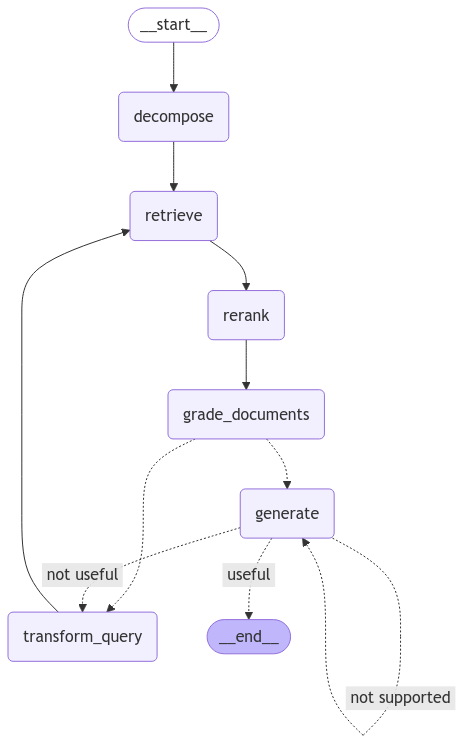

In [26]:
from IPython.display import Image, display

graph = workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
from pprint import pprint

question = "What is BERT?"
inputs = {"question": question}
for output in app.stream(inputs, {"recursion_limit": 50}):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
        print(value)
    pprint("\n---\n")

# Final generation
pprint(value["generation"])
documents = value["documents"]
unique_sources = list(set([(doc.metadata.get('video_title', 'No title found'), doc.metadata.get('video_id', 'No source found')) for doc in documents]))
for title, v_id in unique_sources:
    print(f"Title: {title} \nURL: https://www.youtube.com/watch?v={v_id}")

---QUERY DECOMPOSITION ---


INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


"Node 'decompose':"
{'sub_questions': ['What is BERT?', 'BERT model details'], 'question': 'What is BERT?'}
'\n---\n'
---RETRIEVE---
"Node 'retrieve':"
{'documents': [Document(metadata={'source': 'data/tmp_txt/What is BERT？ ｜ Deep Learning Tutorial 46 (Tensorflow, Keras & Python) [7kLi8u2dJz0].en.txt', 'video_id': '7kLi8u2dJz0', 'video_title': 'What is BERT？ ｜ Deep Learning Tutorial 46 (Tensorflow, Keras & Python) '}, page_content="to build a career in natural language\nprocessing domain\nyou need to have a knowledge of BERT\nwhich is a very popular language model\nby Google.\nIn this video I'm going to explain you\nin a very simple language\nas if you're a high school student\nyou can also understand it easily.\nWhat is the point behind BERT? How BERT\nis used in NLP tasks?\nWe will not go into details of\ntransformer architecture etc.\nBut we'll have an overview of\nhow BERT works basically the BERT model\nthe usage"), Document(metadata={'source': 'data/tmp_txt/What is BERT？ ｜ Deep L

INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


---GRADE: DOCUMENT RELEVANT---


INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


---GRADE: DOCUMENT RELEVANT---


INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
"Node 'grade_documents':"
{'documents': [Document(metadata={'id': 0, 'relevance_score': 0.99910337, 'source': 'data/tmp_txt/What is BERT？ ｜ Deep Learning Tutorial 46 (Tensorflow, Keras & Python) [7kLi8u2dJz0].en.txt', 'video_id': '7kLi8u2dJz0', 'video_title': 'What is BERT？ ｜ Deep Learning Tutorial 46 (Tensorflow, Keras & Python) '}, page_content="to build a career in natural language\nprocessing domain\nyou need to have a knowledge of BERT\nwhich is a very popular language model\nby Google.\nIn this video I'm going to explain you\nin a very simple language\nas if you're a high school student\nyou can also understand it easily.\nWhat is the point behind BERT? How BERT\nis used in NLP tasks?\nWe will not go into details of\ntransformer architecture etc.\nBut we'll have an overview of\nhow BERT works basically the BERT model\nthe usage"), Document(metadata={'id': 10, 'relevance_score': 0.99910337, 'sour

INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


---CHECK HALLUCINATIONS---


INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


score binary_score='no'
'---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---'
"Node 'generate':"
{'documents': [Document(metadata={'id': 0, 'relevance_score': 0.99910337, 'source': 'data/tmp_txt/What is BERT？ ｜ Deep Learning Tutorial 46 (Tensorflow, Keras & Python) [7kLi8u2dJz0].en.txt', 'video_id': '7kLi8u2dJz0', 'video_title': 'What is BERT？ ｜ Deep Learning Tutorial 46 (Tensorflow, Keras & Python) '}, page_content="to build a career in natural language\nprocessing domain\nyou need to have a knowledge of BERT\nwhich is a very popular language model\nby Google.\nIn this video I'm going to explain you\nin a very simple language\nas if you're a high school student\nyou can also understand it easily.\nWhat is the point behind BERT? How BERT\nis used in NLP tasks?\nWe will not go into details of\ntransformer architecture etc.\nBut we'll have an overview of\nhow BERT works basically the BERT model\nthe usage"), Document(metadata={'id': 10, 'relevance_score': 0.99910337, 'source'

INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


---CHECK HALLUCINATIONS---


INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


score binary_score='yes'
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---


INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


---DECISION: GENERATION ADDRESSES QUESTION---
"Node 'generate':"
{'documents': [Document(metadata={'id': 0, 'relevance_score': 0.99910337, 'source': 'data/tmp_txt/What is BERT？ ｜ Deep Learning Tutorial 46 (Tensorflow, Keras & Python) [7kLi8u2dJz0].en.txt', 'video_id': '7kLi8u2dJz0', 'video_title': 'What is BERT？ ｜ Deep Learning Tutorial 46 (Tensorflow, Keras & Python) '}, page_content="to build a career in natural language\nprocessing domain\nyou need to have a knowledge of BERT\nwhich is a very popular language model\nby Google.\nIn this video I'm going to explain you\nin a very simple language\nas if you're a high school student\nyou can also understand it easily.\nWhat is the point behind BERT? How BERT\nis used in NLP tasks?\nWe will not go into details of\ntransformer architecture etc.\nBut we'll have an overview of\nhow BERT works basically the BERT model\nthe usage"), Document(metadata={'id': 10, 'relevance_score': 0.99910337, 'source': 'data/tmp_txt/What is BERT？ ｜ Deep Learnin

In [28]:
documents = value["documents"]
unique_sources = list(set([doc.metadata.get('video_id', 'No source found') for doc in documents]))
unique_urls = [f"https://www.youtube.com/watch?v={v_id}" for v_id in unique_sources]
print(unique_urls)

['https://www.youtube.com/watch?v=6ahxPTLZxU8', 'https://www.youtube.com/watch?v=7kLi8u2dJz0']
